In [2]:
from turtle import color
import tables
from tables import *
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.decomposition import PCA 
import glob 
import matplotlib.pyplot as plt
#import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D 
import plotly.express as px
import plotly.graph_objects as go
import tqdm

In [3]:
#function to retrieve parameter values from cta dataset
def get_img(fname):
    file = tables.open_file(fname,"r")
    #visualize images from the telescope
    img = file.root.dl1.event.telescope.images.LST_LSTCam.col("image")
    px_row = file.root.instrument.telescope.camera.LSTCam.col("pix_x")
    px_col = file.root.instrument.telescope.camera.LSTCam.col("pix_y")

    #number of images in fname
    nb_img = img.shape[1]

    return  img, nb_img

In [19]:
#retrieve all the files from our dataset
train_fnames = glob.glob('Data/training/*.h5',recursive=True)
test_fnames = glob.glob('Data/testing/*.h5',recursive=True)
images = []

for inputfile in tqdm.tqdm(train_fnames):
    image, size_vectorimage = get_img(inputfile)
    images.append(image)

100%|██████████| 500/500 [00:17<00:00, 27.91it/s]


In [109]:
# principal component analysis
def pca(img):

    #Scale data before applying PCA
    scaling = StandardScaler()
    data = img.data

    #use fit and transform method
    scaling.fit(data)
    Scaled_data = scaling.transform(data)

    #set the n_components
    principal = PCA(n_components=500)
    principal.fit(Scaled_data)
    x = principal.transform(Scaled_data)
    # Check the values of eigen vectors
    # prodeced by principal components
    #print("composants principaux ",principal.components_)
    # check how much variance is explained by each principal component
    explained_variance = principal.explained_variance_ratio_
    #print("variance : ",explained_variance)
    explained_variance = np.insert(explained_variance,0,0) #setting x=0 ; y=0 to make the scree plot

    #preparing the cumulative variance data
    cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))
    explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
    cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

    scores = pd.DataFrame(data=x)
    names = []
    for r in range(500):
        names.append( 'PC'+str(r) )
    scores.columns = [names]
    #print(scores)
    pc_df = pd.DataFrame(['',scores], columns=['PC'])
    df_explainedvariance = pd.concat([pc_df,explained_variance_df,cumulative_variance_df], axis=1)
    print(df_explainedvariance)

    fig = plt.figure(figsize=(10,10))
    #choose projection 3d for creating a 3d graph
    axis = fig.add_subplot(111,projection='3d')
    axis.scatter(scores.PC10,scores.PC20,scores.PC30)
    #print(x)

                                                    PC  Explained Variance  \
0                                                                 0.000000   
1                PC0        PC1       PC2       PC3...            0.044926   
2                                                  NaN            0.044551   
3                                                  NaN            0.037722   
4                                                  NaN            0.036606   
..                                                 ...                 ...   
496                                                NaN            0.000204   
497                                                NaN            0.000203   
498                                                NaN            0.000202   
499                                                NaN            0.000201   
500                                                NaN            0.000199   

     Cumulative Variance  
0                  0.000  
1        

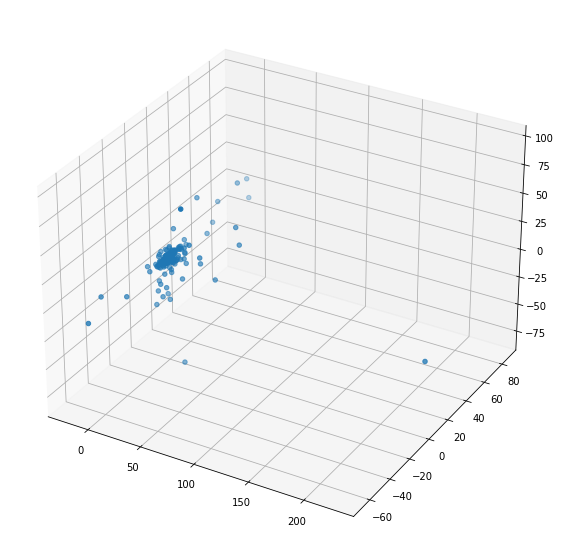

In [110]:
pca(images[0])